<a href="https://colab.research.google.com/github/DhanaTejaDumpa/Data-Driven-Exploration-of-Mobile-App-Market-Across-Countries-using-EDA-/blob/main/Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Website Name  : `AppBrain`

# Urls

* USA : https://www.appbrain.com/stats/google-play-rankings

* India : https://www.appbrain.com/stats/google-play-rankings/top_free/all/in

* canada : https://www.appbrain.com/stats/google-play-rankings/top_free/all/ca

* Australia : https://www.appbrain.com/stats/google-play-rankings/top_free/all/au

* Italy : https://www.appbrain.com/stats/google-play-rankings/top_free/all/it

* UK : https://www.appbrain.com/stats/google-play-rankings/top_free/all/gb

* Indonesia : https://www.appbrain.com/stats/google-play-rankings/top_free/all/id

* Netherlands : https://www.appbrain.com/stats/google-play-rankings/top_free/all/nl

* Switzerland : https://www.appbrain.com/stats/google-play-rankings/top_free/all/ch

* Sweden : https://www.appbrain.com/stats/google-play-rankings/top_free/all/se

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

# Web Scrapping

### Using Regex,Beautiful Soup

In [ ]:
#url = "https://www.appbrain.com/stats/google-play-rankings/top_free/all/in"
url = "https://www.appbrain.com/stats/google-play-rankings/top_free/all/se"

In [ ]:
page = requests.get(url)

In [ ]:
page.status_code

200

In [ ]:
page.text

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n        <title>Google Play Ranking: Top Free Overall in Sweden</title>\n<meta name="description" content="The daily updated Top 500 Android apps of the Top Free Overall in Sweden as seen in Google Play">\n<meta property="og:type" content="website">\n<link rel="canonical" href="https://www.appbrain.com/stats/google-play-rankings/top_free/all/se">\n<meta property="og:url" content="https://www.appbrain.com/stats/google-play-rankings/top_free/all/se">\n<meta property="og:title" content="Google Play Ranking: Top Free Overall in Sweden">\n<meta property="og:description" content="The daily updated Top 500 Android apps of the Top Free Overall in Sweden as seen in Google Play">\n<meta property="og:image" content="https://www.appbrain.com/share-img?url=%2Fstats%2Fgoogle-play-rankings%2Ftop_free%2Fall%2Fse&amp;width=764&amp;height=400&amp;maxCacheSeconds=3600">\n<meta prope

In [ ]:
soup = BeautifulSoup(page.text,"html.parser")

In [ ]:
# shortcut
Recent = []
Installs_no = []
Rating = []
Category = []
App_names = []
App = []
Rank=[]
for i in soup.find_all("tbody") :
  for j in i.find_all("tr"):                     # soup.find_all("td", class_="ranking-app-cell")
    #print(j.text.strip())
    Recent.append(j.find_all("td")[7].text.strip())
    Installs_no.append(j.find_all("td")[6].text.strip())
    Rating.append(j.find_all("td")[5].text.strip())
    Category.append(j.find_all("td")[4].text.strip())
    App_names.append(j.find_all("td")[3].text.strip())
    Rank.append(j.find_all("td")[0].text.strip())
  #  [j.find("a").text.strip() for j in app_cells if cell.find("a")]
print(Recent)
print(Installs_no)
print(Rating)
print(Category)
print(App_names)
print(Rank)

['18 K', '34 M', '47 K', '9 M', '4.5 K', '36 M', '5 M', '7.1 M', '6.1 M', '120 M', '62 K', '40 K', '11 M', '15 M', '36 K', '970 K', '1.7 M', '15 K', '47 M', '30 M', '13 M', '1.3 M', '3.1 M', '57 K', '19 M', '17 K', '1.2 M', '1.4 M', '33 M', '840 K', '57 M', '46 K', '30 M', '1.3 M', '3 M', '9.7 K', '38 M', '16 K', '16 K', '7.3 M', '42 K', '290 K', '9.4 K', '2.5 M', '57 K', '2.2 M', '47 M', '17 K', '32 K', '11 M', '9.7 K', '250 K', '5.9 M', '6.1 M', '4 M', '12 K', '12 K', '810 K', '20 K', '430 K', '9 M', '20 K', '180 K', '1.2 M', '16 M', '1.9 M', '3.2 M', '9.8 K', '8.1 M', '5.8 K', '19 K', '5.8 M', '31 K', '6.3 M', '540 K', '6.3 K', '4.4 M', '36 M', '30 M', '8.3 M', '7.8 K', '10 M', '15 K', '16 K', '160 K', '680 K', '3.1 M', '960 K', '29 M', '20 K', '5.9 M', '1.1 M', '16 K', '2.1 M', '5.4 M', '17 K', '4 M', '3.1 M', '2.7 K']
['2.6 M', '300 M', '440 K', '890 M', '63 K', '650 M', '110 M', '440 M', '490 M', '10 B', '5.4 M', '3.8 M', '210 M', '370 M', '1.1 M', '60 M', '110 M', '49 K', '3.6 B

In [ ]:
df = pd.DataFrame({"App_names":App_names,"Category":Category,"Rank":Rank,"Rating":Rating,"Installs_no":Installs_no,"Recent":Recent})
df

,App_names,Category,Rank,Rating,Installs_no,Recent
0,Skatteverket\n\n by...,Finance,1,3.8,2.6 M,18 K
1,ChatGPT\n\n by OpenAI,Productivity,2,4.8,300 M,34 M
2,Bring\n\n by Posten...,Tools,3,2.6,440 K,47 K
3,Amazon Shopping\n\n ...,Shopping,4,4.4,890 M,9 M
4,Telia Trygg\n\n by ...,Tools,5,0.0,63 K,4.5 K
...,...,...,...,...,...,...
94,DeepSeek - AI Assistant\n\n ...,Productivity,95,4.1,36 M,5.4 M
95,Tradera – buy & sell\n\n ...,Shopping,96,4.6,2.2 M,17 K
96,"PayPal - Pay, Send, Save\n\n ...",Finance,97,4.3,400 M,4 M
97,AI Chat: Ask AI Chat Anything\n\n ...,Productivity,98,4.8,26 M,3.1 M


In [ ]:
App = []
for i in df.App_names:
  if re.findall(r"^(.*)\n\n",i):
        App.append("".join(re.findall(r"^(.*)\n\n",i.strip())))
        #App.append(i.strip())

In [ ]:
App

['Skatteverket',
 'ChatGPT',
 'Bring',
 'Amazon Shopping',
 'Telia Trygg',
 'Temu: Shop Like a Billionaire',
 'Max: Stream HBO, TV, & Movies',
 'Disney+',
 'Microsoft Teams',
 'WhatsApp Messenger',
 'PostNord: Track & Send Parcels',
 'Kivra Sweden',
 'PDF Reader - PDF Viewer',
 'Threads',
 'Aimo - Parking with Aimo Park',
 'Too Good To Go: End Food Waste',
 'Lidl Plus',
 'Biblio',
 'TikTok',
 'CapCut - Video Editor',
 'Duolingo: Language Lessons',
 'Vinted - Buy and sell clothes',
 'Microsoft Authenticator',
 'Parkster - Smooth parking',
 'Google Gemini',
 '1177',
 'Blood Pressure',
 'Revolut: Spend, Save, Trade',
 'Google Wallet',
 'PDF Reader Zone',
 'Instagram',
 'BankID security app',
 'Telegram',
 'Klarna | Shop now. Pay later.',
 'Pluto TV: Free Movies & TV',
 'Svea Pay',
 'Snapchat',
 'SOS Alarm',
 'ICA – recept och erbjudanden',
 'Prime Video',
 'Circle K',
 'EasyPark - Parking made easy',
 'Coop | Mat Erbjudanden Medlem',
 'HeartTrack Launcher',
 'SVT Play',
 'Microsoft Edge: 

In [ ]:
App_df = pd.DataFrame(App,columns = ["App_Name"])
App_df

,App_Name
0,Skatteverket
1,ChatGPT
2,Bring
3,Amazon Shopping
4,Telia Trygg
...,...
94,DeepSeek - AI Assistant
95,Tradera – buy & sell
96,"PayPal - Pay, Send, Save"
97,AI Chat: Ask AI Chat Anything


In [ ]:
df.insert(6,"Country","Sweden")
df

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
0,Skatteverket\n\n by...,Finance,1,3.8,2.6 M,18 K,Sweden
1,ChatGPT\n\n by OpenAI,Productivity,2,4.8,300 M,34 M,Sweden
2,Bring\n\n by Posten...,Tools,3,2.6,440 K,47 K,Sweden
3,Amazon Shopping\n\n ...,Shopping,4,4.4,890 M,9 M,Sweden
4,Telia Trygg\n\n by ...,Tools,5,0.0,63 K,4.5 K,Sweden
...,...,...,...,...,...,...,...
94,DeepSeek - AI Assistant\n\n ...,Productivity,95,4.1,36 M,5.4 M,Sweden
95,Tradera – buy & sell\n\n ...,Shopping,96,4.6,2.2 M,17 K,Sweden
96,"PayPal - Pay, Send, Save\n\n ...",Finance,97,4.3,400 M,4 M,Sweden
97,AI Chat: Ask AI Chat Anything\n\n ...,Productivity,98,4.8,26 M,3.1 M,Sweden


In [ ]:
df.App_names = App_df.App_Name

In [ ]:
df

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
0,Skatteverket,Finance,1,3.8,2.6 M,18 K,Sweden
1,ChatGPT,Productivity,2,4.8,300 M,34 M,Sweden
2,Bring,Tools,3,2.6,440 K,47 K,Sweden
3,Amazon Shopping,Shopping,4,4.4,890 M,9 M,Sweden
4,Telia Trygg,Tools,5,0.0,63 K,4.5 K,Sweden
...,...,...,...,...,...,...,...
94,DeepSeek - AI Assistant,Productivity,95,4.1,36 M,5.4 M,Sweden
95,Tradera – buy & sell,Shopping,96,4.6,2.2 M,17 K,Sweden
96,"PayPal - Pay, Send, Save",Finance,97,4.3,400 M,4 M,Sweden
97,AI Chat: Ask AI Chat Anything,Productivity,98,4.8,26 M,3.1 M,Sweden


In [ ]:
df.to_csv("App_Sweden.csv")

In [ ]:
df1=pd.read_csv('App_Usa.csv')
df2=pd.read_csv('App_India.csv')
df3=pd.read_csv('App_Canada.csv')
df4=pd.read_csv('App_UK.csv')
df5=pd.read_csv('App_Switzerland.csv')
df6=pd.read_csv('App_Sweden.csv')
df7=pd.read_csv('App_Netherlands.csv')
df8=pd.read_csv('App_Italy.csv')
df9=pd.read_csv('App_Indonesia.csv')
df10=pd.read_csv('App_Australia.csv')

In [ ]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],ignore_index=True)

## Data Frame :

In [ ]:
df.head()

,Unnamed: 0,App_names,Category,Rank,Rating,Installs_no,Recent,Country
0,0,TikTok,Social,1,4.1,3.6 B,47 M,USA
1,1,Temu: Shop Like a Billionaire,Shopping,2,4.6,640 M,35 M,USA
2,2,WhatsApp Messenger,Communication,3,4.5,10 B,100 M,USA
3,3,QR Scanner and Barcode Reader,Tools,4,4.2,2.6 M,2.6 M,USA
4,4,ChatGPT,Productivity,5,4.8,290 M,32 M,USA


In [ ]:
df.shape

(999, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   999 non-null    int64  
 1   App_names    999 non-null    object 
 2   Category     999 non-null    object 
 3   Rank         999 non-null    int64  
 4   Rating       999 non-null    float64
 5   Installs_no  999 non-null    object 
 6   Recent       999 non-null    object 
 7   Country      999 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


# Data Cleaning :            

In [ ]:
df[df.duplicated()==True]

,Unnamed: 0,App_names,Category,Rank,Rating,Installs_no,Recent,Country


In [ ]:
df.columns

Index(['Unnamed: 0', 'App_names', 'Category', 'Rank', 'Rating', 'Installs_no',
       'Recent', 'Country'],
      dtype='object')

In [ ]:
# Remove the unnecessary index column
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Function to convert install numbers to numeric values
def convert_installs(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace(' B', '')) * (10**9)
        elif 'M' in value:
            return float(value.replace(' M', '')) * (10**6)
        elif 'K' in value:
            return float(value.replace(' K', '')) * (10**3)
    return float(value)  # If already a number

# Apply conversion to 'Installs_no' and 'Recent' columns
if 'Installs_no' in df.columns:
    df['Installs_no'] = df['Installs_no'].apply(convert_installs)
if 'Recent' in df.columns:
    df['Recent'] = df['Recent'].apply(convert_installs)

In [ ]:
df

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
0,TikTok,Social,1,4.1,3.600000e+09,47000000.0,USA
1,Temu: Shop Like a Billionaire,Shopping,2,4.6,6.400000e+08,35000000.0,USA
2,WhatsApp Messenger,Communication,3,4.5,1.000000e+10,100000000.0,USA
3,QR Scanner and Barcode Reader,Tools,4,4.2,2.600000e+06,2600000.0,USA
4,ChatGPT,Productivity,5,4.8,2.900000e+08,32000000.0,USA
...,...,...,...,...,...,...,...
994,PDF View Finder,Productivity,96,4.4,1.800000e+06,600000.0,Australia
995,Flybuys,Shopping,97,3.5,3.100000e+06,41000.0,Australia
996,Xero Verify,Business,98,4.5,1.300000e+06,26000.0,Australia
997,Radio Australia - online radio,Music & Audio,99,4.7,5.900000e+05,9700.0,Australia


In [ ]:
df.to_csv("Cleaned_Apps.csv",index=False)

In [ ]:
cdf=pd.read_csv('Cleaned_Apps.csv')

In [ ]:
cdf[cdf.duplicated()==True]

,App_names,Category,Rank,Rating,Installs_no,Recent,Country


In [ ]:
cdf.isna().sum()

,0
App_names,0
Category,0
Rank,0
Rating,0
Installs_no,0
Recent,0
Country,0


In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   App_names    999 non-null    object 
 1   Category     999 non-null    object 
 2   Rank         999 non-null    int64  
 3   Rating       999 non-null    float64
 4   Installs_no  999 non-null    float64
 5   Recent       999 non-null    float64
 6   Country      999 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [ ]:
zdf=cdf[cdf['Installs_no']==0]

In [ ]:
zdf

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
150,Navi - Instant Personal and Home Loans,Finance,51,3.9,0.0,0.0,India
173,"Bajaj Finserv - Instant Loans,Credit Card,EMI ...",Finance,74,4.3,0.0,0.0,India
175,"MobiKwik- UPI, Bills, PayLater",Finance,76,4.4,0.0,0.0,India
240,Walmart Shopping Made Easy,Shopping,41,4.0,0.0,0.0,Canada
322,Tesco Groceries: Food Shop,Shopping,23,3.8,0.0,0.0,UK
788,FlashScore,Sports,90,4.5,0.0,0.0,Italy
869,Adakami - Online Loans,Finance,71,4.5,0.0,0.0,Indonesia
891,Pinjamwinwin,Finance,93,4.2,0.0,0.0,Indonesia
993,Sportsbet - Online Betting App,Sports,95,4.9,0.0,0.0,Australia


In [ ]:
zdf.to_csv('Zero_Installs.csv',index=False)

In [ ]:
cdf = cdf[cdf['Installs_no']!=0]

In [ ]:
cdf

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
0,TikTok,Social,1,4.1,3.600000e+09,47000000.0,USA
1,Temu: Shop Like a Billionaire,Shopping,2,4.6,6.400000e+08,35000000.0,USA
2,WhatsApp Messenger,Communication,3,4.5,1.000000e+10,100000000.0,USA
3,QR Scanner and Barcode Reader,Tools,4,4.2,2.600000e+06,2600000.0,USA
4,ChatGPT,Productivity,5,4.8,2.900000e+08,32000000.0,USA
...,...,...,...,...,...,...,...
994,PDF View Finder,Productivity,96,4.4,1.800000e+06,600000.0,Australia
995,Flybuys,Shopping,97,3.5,3.100000e+06,41000.0,Australia
996,Xero Verify,Business,98,4.5,1.300000e+06,26000.0,Australia
997,Radio Australia - online radio,Music & Audio,99,4.7,5.900000e+05,9700.0,Australia


In [ ]:
cdf.shape

(990, 7)

In [ ]:
cdf.to_csv('Apps.csv',index=False)

In [ ]:
adf=pd.read_csv('Apps.csv')

In [ ]:
adf.head()

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
0,TikTok,Social,1,4.1,3.600000e+09,47000000.0,USA
1,Temu: Shop Like a Billionaire,Shopping,2,4.6,6.400000e+08,35000000.0,USA
2,WhatsApp Messenger,Communication,3,4.5,1.000000e+10,100000000.0,USA
3,QR Scanner and Barcode Reader,Tools,4,4.2,2.600000e+06,2600000.0,USA
4,ChatGPT,Productivity,5,4.8,2.900000e+08,32000000.0,USA


In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   App_names    990 non-null    object 
 1   Category     990 non-null    object 
 2   Rank         990 non-null    int64  
 3   Rating       990 non-null    float64
 4   Installs_no  990 non-null    float64
 5   Recent       990 non-null    float64
 6   Country      990 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.3+ KB


In [ ]:
adf.Category.nunique()

26

In [ ]:
adf['Category']=adf['Category'].astype('category')

In [ ]:
adf['Country']=adf['Country'].astype('category')

In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   App_names    990 non-null    object  
 1   Category     990 non-null    category
 2   Rank         990 non-null    int64   
 3   Rating       990 non-null    float64 
 4   Installs_no  990 non-null    float64 
 5   Recent       990 non-null    float64 
 6   Country      990 non-null    category
dtypes: category(2), float64(3), int64(1), object(1)
memory usage: 42.4+ KB


# Descriptive Statistics :           

In [ ]:
adf.describe(include='all')

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
count,990,990,990.000000,990.000000,9.900000e+02,9.900000e+02,990
unique,531,26,NaN,NaN,NaN,NaN,10
top,PDF Reader - PDF Viewer,Tools,NaN,NaN,NaN,NaN,Switzerland
freq,14,129,NaN,NaN,NaN,NaN,100
mean,NaN,NaN,50.288889,4.072424,6.773337e+08,9.262412e+06,NaN
std,NaN,NaN,28.846012,1.049636,1.681143e+09,1.708059e+07,NaN
min,NaN,NaN,1.000000,0.000000,1.000000e+01,4.000000e+00,NaN
25%,NaN,NaN,25.000000,4.000000,8.100000e+06,6.125000e+05,NaN
50%,NaN,NaN,50.000000,4.400000,6.800000e+07,2.600000e+06,NaN
75%,NaN,NaN,75.000000,4.600000,5.200000e+08,8.500000e+06,NaN


# Analysis and Visualization :            

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
adf = pd.read_csv("Apps.csv")
adf.head()

,App_names,Category,Rank,Rating,Installs_no,Recent,Country
0,TikTok,Social,1,4.1,3.600000e+09,47000000.0,USA
1,Temu: Shop Like a Billionaire,Shopping,2,4.6,6.400000e+08,35000000.0,USA
2,WhatsApp Messenger,Communication,3,4.5,1.000000e+10,100000000.0,USA
3,QR Scanner and Barcode Reader,Tools,4,4.2,2.600000e+06,2600000.0,USA
4,ChatGPT,Productivity,5,4.8,2.900000e+08,32000000.0,USA


# Univariate Analysis :                

### Distribution of Apps by Category :           
`Query:` Which app categories have the highest number of apps?

`Insights:`
* Top Categories: Categories with the most apps dominate the market, indicating high competition.
* Niche Categories: Less frequent categories may offer opportunities with lower competition.

<ipython-input-13-51060ba8d5ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adf,x='Category',order=adf['Category'].value_counts().index,palette='viridis')


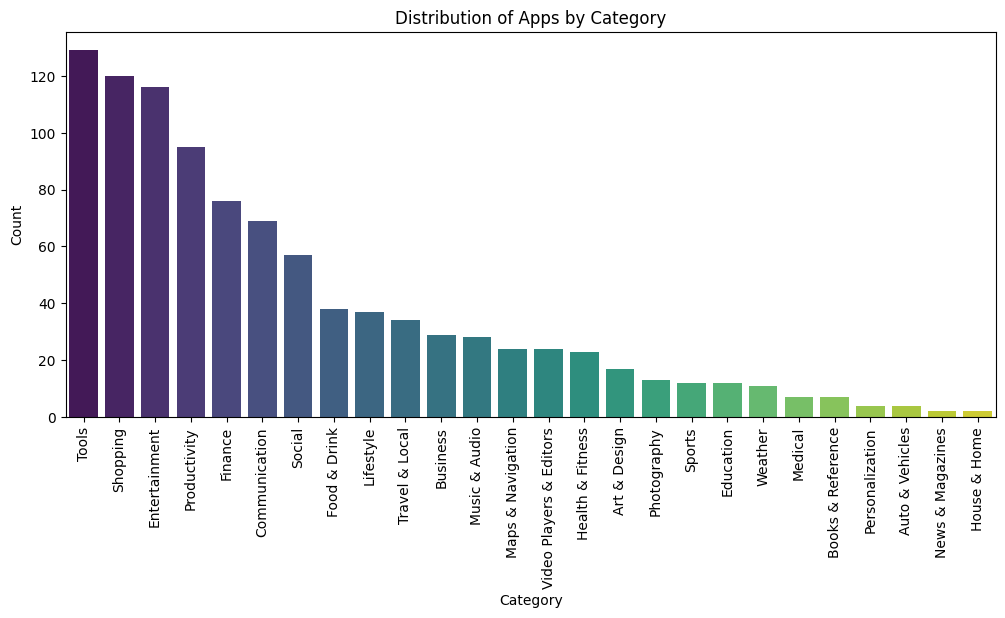

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=adf,x='Category',order=adf['Category'].value_counts().index,palette='viridis')
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Distribution of Apps by Category")
plt.savefig('Category_dist.png', dpi=300, bbox_inches='tight')
plt.show()

### Distribution of App Ratings :
`Query:` How ratings are distributed across all apps.

`Insight:` You can determine if most apps are highly rated or if the market is flooded with poorly rated ones.

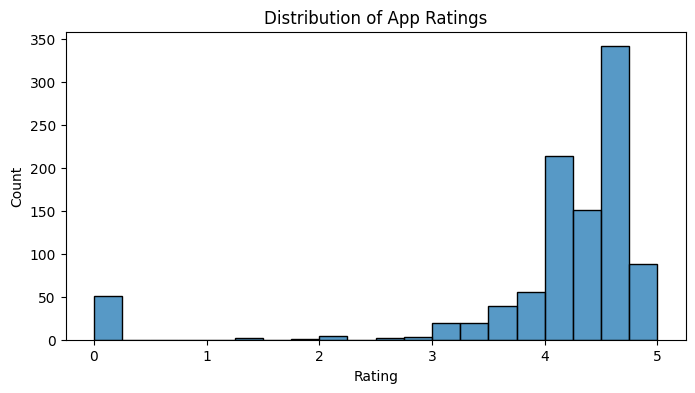

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=adf,x='Rating',bins=20)
plt.title('Distribution of App Ratings')
plt.savefig('App Ratings.png', dpi=300, bbox_inches='tight')
plt.show()

# Bivariate Analysis :             

### 1. **Top Categories by Total Installs**
`Query`: Identify the top 10 categories with the highest total installs.

`Insight`: This will reveal which app categories dominate the market in terms of user base.

<ipython-input-14-afa57a3ad628>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values,y=top_categories.index,palette=custom_colors)


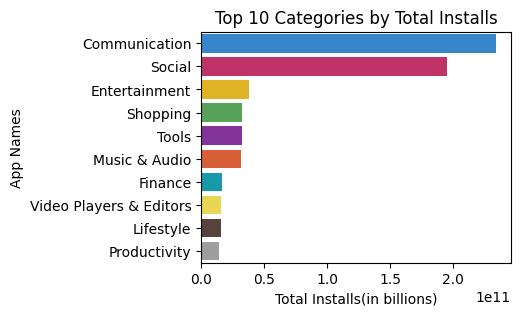

In [ ]:
top_categories=adf.groupby('Category')['Installs_no'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(4,3))
custom_colors = ["#1E88E5", "#D81B60", "#FFC107", "#4CAF50", "#8E24AA",
                 "#F4511E", "#00ACC1", "#FFEB3B", "#5D4037", "#9E9E9E"]
sns.barplot(x=top_categories.values,y=top_categories.index,palette=custom_colors)
plt.title("Top 10 Categories by Total Installs")
plt.xlabel("Total Installs(in billions)")
plt.ylabel("App Names")
plt.savefig('Categories_by_installs.png', dpi=300, bbox_inches='tight')
plt.show()

###  **Top 10 Apps by Recent Installs**

`Query`: Identify the 10 apps with the most recent installs.

`Insight`: This will highlight trending or rapidly growing apps, giving a snapshot of current market momentum.

<ipython-input-19-cebbffe2dd34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recent_apps.values,y=top_recent_apps.index,palette=custom_colors)


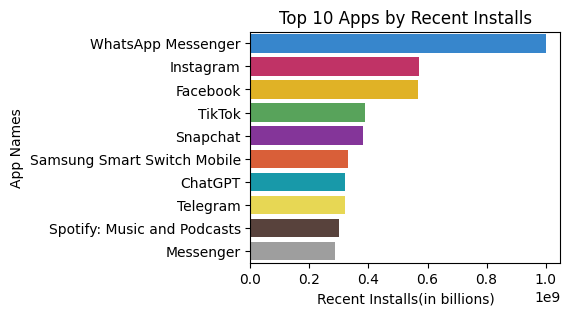

In [ ]:
top_recent_apps=adf.groupby('App_names')['Recent'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(4,3))
custom_colors = ["#1E88E5", "#D81B60", "#FFC107", "#4CAF50", "#8E24AA",
                 "#F4511E", "#00ACC1", "#FFEB3B", "#5D4037", "#9E9E9E"]
sns.barplot(x=top_recent_apps.values,y=top_recent_apps.index,palette=custom_colors)
plt.title("Top 10 Apps by Recent Installs")
plt.xlabel("Recent Installs(in billions)")
plt.ylabel("App Names")
plt.savefig('apps_by_recent_installs.png', dpi=300, bbox_inches='tight')
plt.show()

### **Correlation Between Ratings and Total Installs** :
`Query:` Check the correlation between app ratings and total installs.

`Insight:` This will help us determine whether highly rated apps tend to have more installs or if there is no clear relationship.

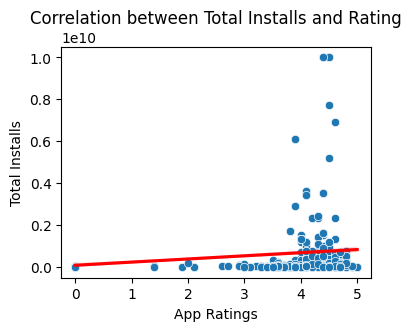

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=adf,x='Rating',y='Installs_no')
sns.regplot(data=adf,x='Rating',y='Installs_no',scatter=False,color='red')
plt.title('Correlation between Total Installs and Rating')
plt.xlabel("App Ratings")
plt.ylabel("Total Installs")
plt.savefig('Correlation_tot_installs_rating.png', dpi=300, bbox_inches='tight')
plt.show()

### Install Growth Rate (Recent vs. Total Installs)
`Query:` Calculate the growth rate by comparing recent installs to total installs.

`Insight:` This will reveal which apps are experiencing the most significant recent growth, helping identify trending or rapidly expanding apps.

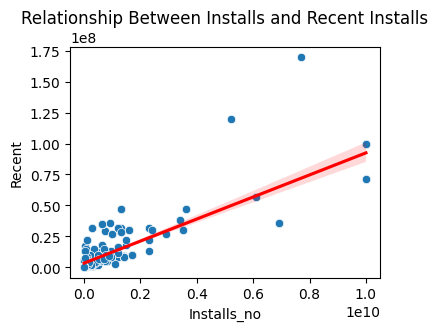

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=adf,x='Installs_no',y='Recent')
sns.regplot(data=adf,x='Installs_no',y='Recent',scatter=False,color='red')
plt.title('Relationship Between Installs and Recent Installs')
plt.savefig('correlation_installs_recent.png', dpi=300, bbox_inches='tight')

### Category-Wise Install Distribution
`Query:` Analyze the install distribution across different categories.

`Insight:` This will show how installs vary within each category, highlighting which categories have higher median installs and more variability.

<ipython-input-21-0254dbb7b2a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Installs_no', data=adf, palette='muted')


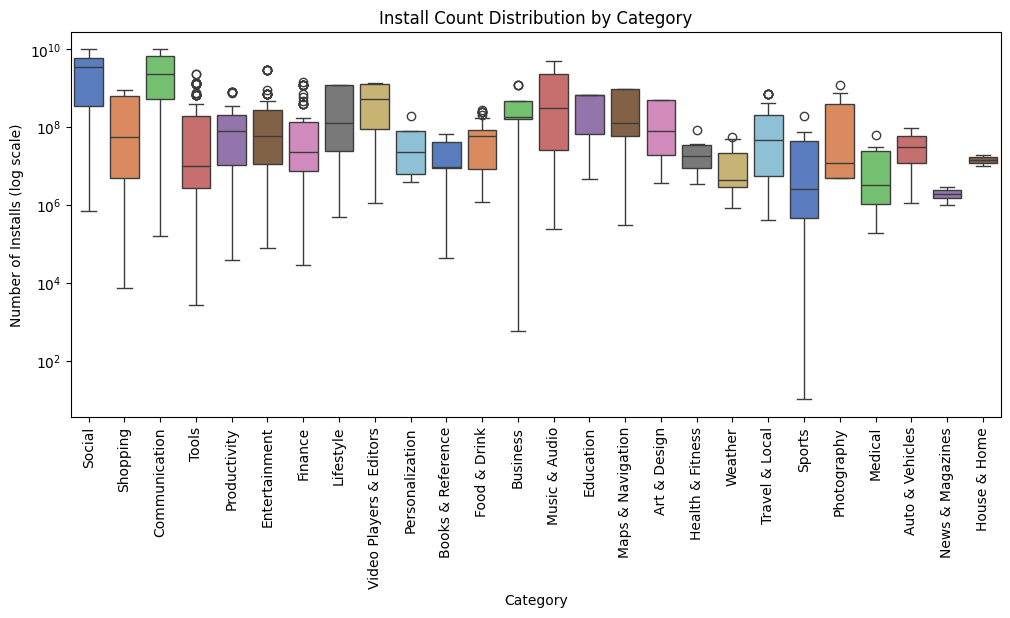

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Category', y='Installs_no', data=adf, palette='muted')
plt.yscale("log")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Installs (log scale)")
plt.title("Install Count Distribution by Category")
plt.savefig('category_box_plot.png', dpi=300, bbox_inches='tight')
plt.show()

###  Correlation Between Rating and Installs :        
`Query:` Analyze the correlation between app ratings and total installs.

`Insight:` This will reveal whether higher-rated apps tend to have more installs, highlighting the relationship between quality and popularity.

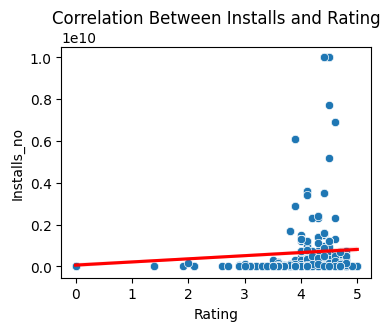

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=adf,x='Rating',y='Installs_no')
sns.regplot(data=adf,x='Rating',y='Installs_no',scatter=False,color='red')
plt.title('Correlation Between Installs and Rating')
plt.savefig('Correlations_installs_rating.png', dpi=300, bbox_inches='tight')
plt.show()

### Average Rating by Category :         
`Query:` which categories have the highest user satisfaction.

`Insight:` Categories with consistently high ratings may indicate better app quality or customer experience.

<ipython-input-97-2bdb22e999f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='coolwarm')


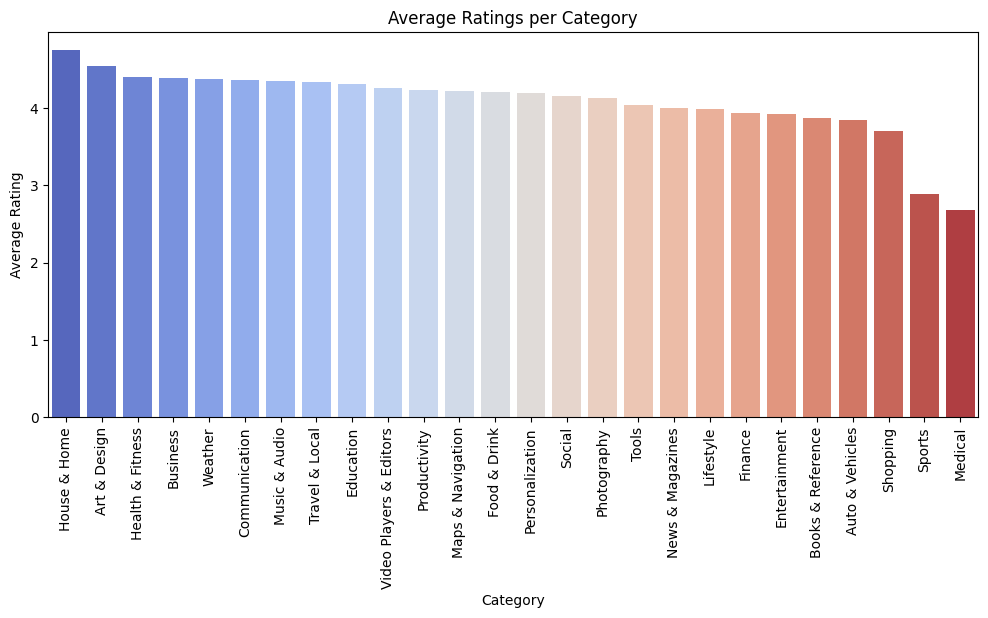

In [ ]:
plt.figure(figsize=(12, 5))
avg_ratings = adf.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='coolwarm')
#sns.barplot(x=adf.groupby('Category')['Rating'].mean().index,
   #         y=adf.groupby('Category')['Rating'].mean().values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.title("Average Ratings per Category")
plt.savefig('Avg_rating_per_category.png', dpi=300, bbox_inches='tight')
plt.show()

### Top 10 Apps with the Highest Ratings
`Query:` Apps that deliver excellent user experiences.

`Insight:` You can highlight the best-performing apps in terms of user satisfaction.


<ipython-input-22-8e78d0826863>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated["Rating"], y=top_rated["App_names"], palette="viridis")


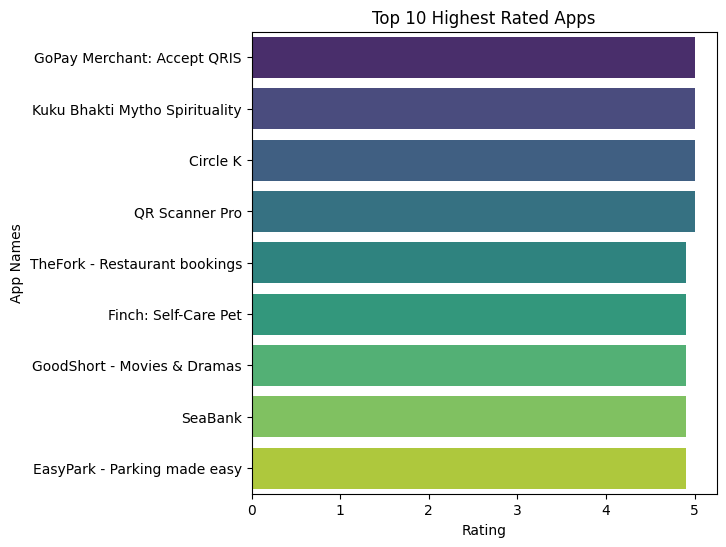

In [ ]:
top_rated = adf.sort_values(by="Rating", ascending=False).head(10)
plt.figure(figsize=(6, 6))
sns.barplot(x=top_rated["Rating"], y=top_rated["App_names"], palette="viridis")
plt.title("Top 10 Highest Rated Apps")
plt.xlabel("Rating")
plt.ylabel("App Names")
plt.savefig('Highest_rated_apps.png', dpi=300, bbox_inches='tight')
plt.show()

### Categories with the Highest Recent Installs :
`Query:` which categories are currently growing the fastest.

`Insight:` This shows trending app types that may be worth investing in.

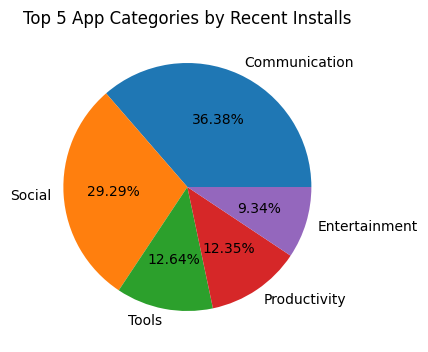

In [ ]:
top_recent_install_category=adf.groupby('Category')['Recent'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(4,6))
plt.pie(top_recent_install_category.values, labels=top_recent_install_category.index, autopct="%1.2f%%")
plt.title('Top 5 App Categories by Recent Installs')
plt.savefig('5_Categories_by_recent_installs.png', dpi=300, bbox_inches='tight')
plt.show()

### Categories with the Highest Installs :
`Query:` which categories are currently growing the fastest.

`Insight:` This shows trending app types that may be worth investing in

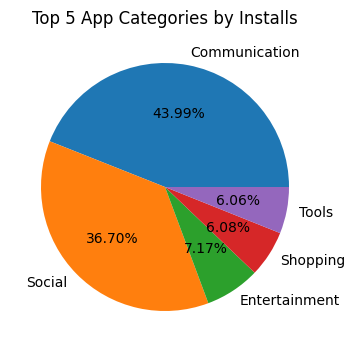

In [ ]:
top_install_category=adf.groupby('Category')['Installs_no'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(4,6))
plt.pie(top_install_category.values, labels=top_install_category.index, autopct="%1.2f%%")
plt.title('Top 5 App Categories by Installs')
plt.savefig('5_Categories_by_installs.png', dpi=300, bbox_inches='tight')
plt.show()

### App Categories with the Lowest Ratings
`Query:` Highlights categories with dissatisfied users.

`Insight:` Developers or businesses might want to avoid these categories or identify improvement areas.

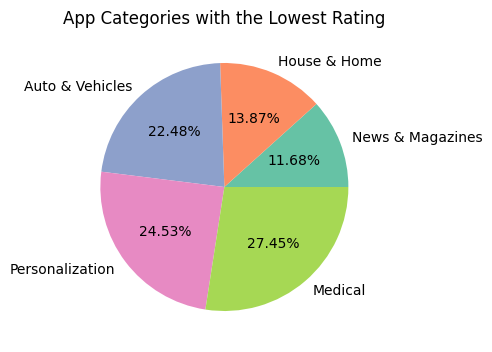

In [ ]:
low_rating_category=adf.groupby('Category')['Rating'].sum().sort_values().head(5)
low_rating_category
plt.figure(figsize=(4,6))
colors = sns.color_palette('Set2', n_colors=5)
plt.pie(low_rating_category.values, labels=low_rating_category.index, autopct="%1.2f%%",colors=colors)
plt.title('App Categories with the Lowest Rating')
plt.savefig('5Categories_by_lowest_rating.png', dpi=300, bbox_inches='tight')
plt.show()

### App Categories with the Highest Ratings :          
`Query:` Highlights categories with most satisfied users.

`Insight:` Developers or businesses might want to avoid these categories or identify improvement areas.

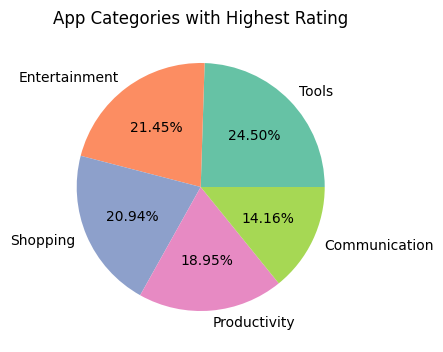

In [ ]:
top_rating_category=adf.groupby('Category')['Rating'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(4,6))
colors = sns.color_palette('Set2', n_colors=5)
plt.pie(top_rating_category.values, labels=top_rating_category.index, autopct="%1.2f%%",colors=colors)
plt.title('App Categories with Highest Rating')
plt.savefig('5Categories_by_highest_rating.png', dpi=300, bbox_inches='tight')
plt.show()

# Multivariate Analysis :              

### Correlation Matrix of Installs, Recent Activity, and Ratings :        

`Query:` What is the correlation between app installs, recent activity, and ratings?

`Insights:`
* Installs ↔ Recent Activity: Strong positive correlation (0.88), indicating that apps with more installs tend to have higher recent activity.

* Rating ↔ Installs/Activity: Weak correlation (0.094 and 0.13), suggesting that higher installs or activity do not guarantee better ratings.

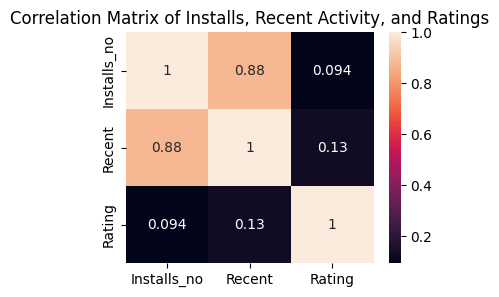

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(adf[['Installs_no','Recent','Rating']].corr(),annot=True)
plt.title('Correlation Matrix of Installs, Recent Activity, and Ratings')
plt.savefig('Heat_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Most Popular App by Country based on Ratings:
`Query:` Identify the most popular app categories by country based on Ratings.

`Insight:` This will reveal which app categories dominate in different regions, highlighting regional preferences.

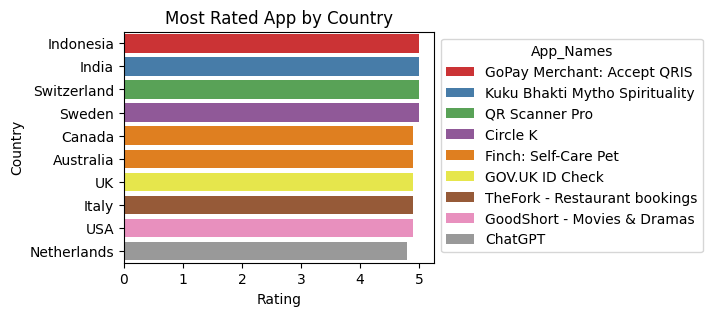

In [ ]:
top_rated_app=adf.loc[adf.groupby("Country")["Rating"].idxmax()].sort_values(by = ['Rating'],ascending = False)
plt.figure(figsize=(4,3))
sns.barplot(data=top_rated_app,y='Country',x='Rating',hue='App_names',palette='Set1')
plt.legend(title='App_Names',prop={'size':10},loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Most Rated App by Country')
plt.savefig('Most_Popular_App.png', dpi=300, bbox_inches='tight')
plt.show()

### Most Popular App by Category based on Installs:

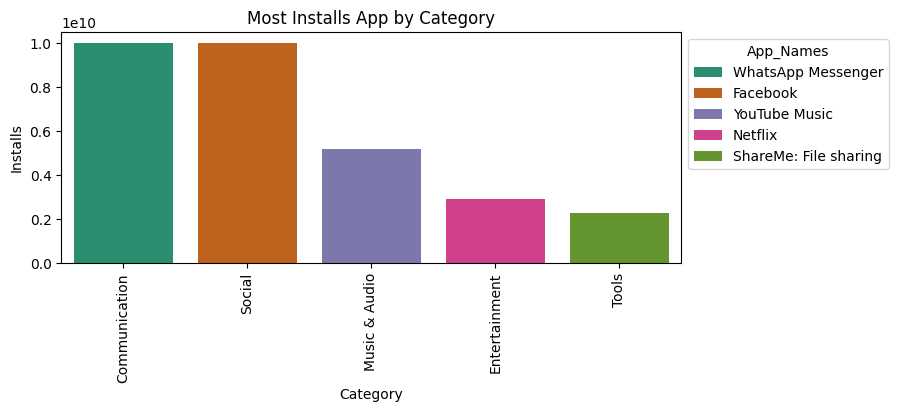

In [ ]:
top_rated_app=adf.loc[adf.groupby("Category")["Installs_no"].idxmax()].sort_values(by = ['Installs_no'],ascending = False).head()
plt.figure(figsize=(8,3))
sns.barplot(data=top_rated_app,x='Category',y='Installs_no',hue='App_names',palette='Dark2')
plt.legend(title='App_Names',prop={'size':10},loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title('Most Installs App by Category')
plt.savefig('Most_installed_app_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

### Most Popular App by Country based on Total Installs:
`Query:` Identify the most popular app categories by country based on total installs.

`Insight:` This will reveal which app categories dominate in different regions, highlighting regional preferences.

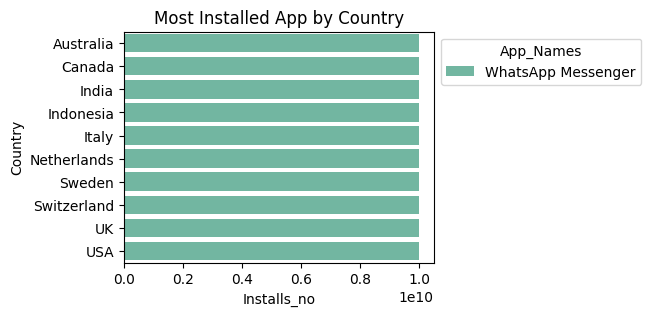

In [ ]:
top_installed_app=adf.loc[adf.groupby("Country")["Installs_no"].idxmax()]
plt.figure(figsize=(4,3))
sns.barplot(data=top_installed_app,y='Country',x='Installs_no',hue='App_names',palette='Set2')
plt.legend(title='App_Names',prop={'size':10},loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Most Installed App by Country')
plt.savefig('Most_popular_app_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

### Most Popular App by Country based on Recent Installs:
`Query:` Identify the most popular app categories by country based on recent installs.

`Insight:` This will reveal which app categories dominate in different regions, highlighting regional preferences.

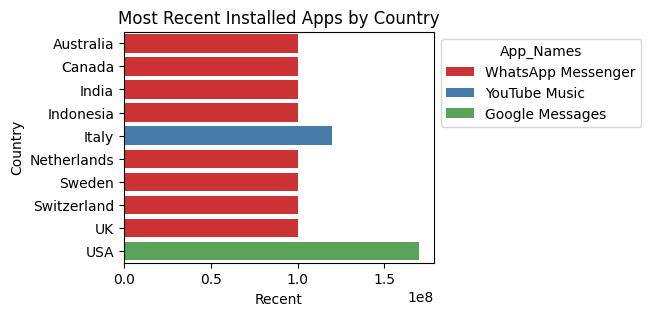

In [ ]:
top_Recent_app=adf.loc[adf.groupby("Country")["Recent"].idxmax()]
plt.figure(figsize=(4,3))
sns.barplot(data=top_Recent_app,y='Country',x='Recent',hue='App_names',palette='Set1')
plt.legend(title='App_Names',prop={'size':10},loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Most Recent Installed Apps by Country')
plt.savefig('Most_recent_installed_app.png', dpi=300, bbox_inches='tight')
plt.show()